# 0 準備


In [ ]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!jupyter contrib nbextension install --user
!jupyter nbextension enable hinterland/hinterland

# KaggleのAPIを利用ためのインストール
!pip install kaggle

# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

     | 23.4 MB 28.9 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00
  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23429119 sha256=63b0e4b87405841069d28ddba31022b81a00f85a345b729365362d8f45c3414c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6mumjtgj/wheels/2f/2d/27/e9431b9d2d758cf3fb2f78609245ddcc39add3a0012a159f22
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17483 sha256=4b7b6ea7b79742b5c4c2115549bc83b83803c38bcf8017db88070e5937cd3cf2
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter-contrib-nbextensions jupyter_contrib_core
[I 14:34:54 InstallContribNbextensionsA

In [ ]:
# KaggleのAPIを利用するための設定
# 初回のみJSONファイルをダウンロードして、Google Driveに保存する必要がある
import os
import json
f = open("/content/drive/MyDrive/Colab Notebooks/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

In [ ]:
# Kaggleの各コンペページから、APIコマンドを取得し実施
# 今回は「Doenload(8MB)」の横にある縦3点リーダの中にある「Copy API command」をクリックした取得した
!kaggle competitions download -c playground-series-s4e2



  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 90.6MB/s]


In [ ]:
# # !unzip <ダウンロードしたZIPファイル>
!unzip '/content/playground-series-s4e2.zip'

Archive:  /content/playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               



# 1 データ読み込みと把握


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/train.csv").set_index("id")
test = pd.read_csv("/content/test.csv").set_index("id")

In [ ]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# 'Gender', 'Age', 'Height', 'Weight' are physical attributes
# 'family_history_with_overweight' points out to familiarity with obesity
# FAVC = Frequent consumption of high caloric food
# FCVC = Frequency of consumption of vegetables
# NCP = Number of main meals
# CAEC = Consumption of food between meals
# SMOKE = tobacco usage
# CH20 = Consumption of water daily
# SCC = Calories consumption monitoring
# FAF = Physical activity frequency
# TUE = Time using technology devices
# CALC = Consumption of alcohol
# MTRANS = Transportation used
test.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
target = train['NObeyesdad']
train = train.drop('NObeyesdad', axis='columns')
target.value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

# 2 ターゲット(肥満度)分析

In [ ]:
# 肥満度の割合
target.value_counts() / len(target)

Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: NObeyesdad, dtype: float64

<ipython-input-11-04b9bc5afada>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)
<ipython-input-11-04b9bc5afada>:15: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)
<ipython-input-11-04b9bc5afada>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right', fontsize=8)


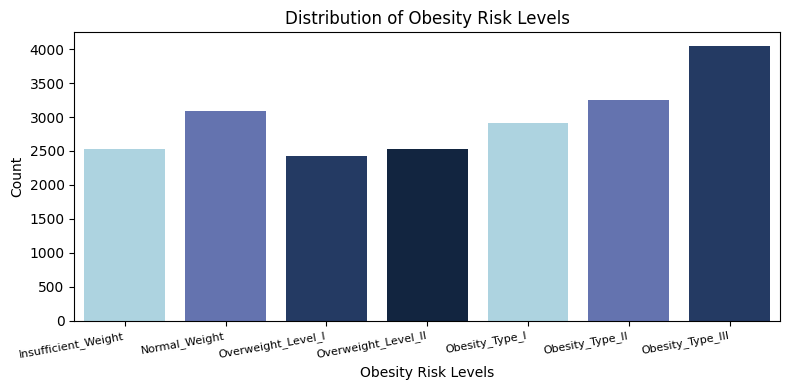

In [ ]:
# 各肥満度のデータ数を可視化

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
cmap_custom = ListedColormap(color_list)

sorted_labels = ['Insufficient_Weight', 'Normal_Weight',
 'Overweight_Level_I', 'Overweight_Level_II',
 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

plt.figure(figsize=(8, 4))
ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)

plt.title('Distribution of Obesity Risk Levels')
plt.xlabel('Obesity Risk Levels')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    """
    One-Hotエンコーディング
    肥満度を痩せ型から順に0,1,2・・6に変換
    """

    def __init__(self, sorted_labels):
        self.classes_ = sorted_labels
        self.label_to_numeric_mapping = None

    def fit(self):
        """
        ラベルと数字を対応させる
        """
        self.label_to_numeric_mapping = {label: numeric for numeric, label in enumerate(self.classes_)}
        return self

    def transform(self, y):
        """
        ラベル -> 数値
        """
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before transform")
        return y.map(self.label_to_numeric_mapping)

    def inverse_transform(self, y):
        """
        数値 ->ラベル
        """

        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before inverse_transform")
        return pd.Series(y).map({numeric: label for label, numeric in self.label_to_numeric_mapping.items()})

In [ ]:
## 肥満度が数値になっているか確認
target_encoder = CustomLabelEncoder(sorted_labels)
target_encoder.fit()
target_numeric = target_encoder.transform(target)
target_numeric

id
0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20758, dtype: int64

# 3 探索的データ解析（EDA）
データの構造を把握し特徴量を可視化する

## 3.1 欠損値の確認

In [ ]:
# データに欠損値がないか確認
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [ ]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

## 3.2 データのタイプを把握

In [ ]:
train.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [ ]:
# 文字ラベルの列か数字データの列かを判別し
# それらの列名を取得
categorical_features = train.columns[train.dtypes == "object"].tolist()  # カテゴリ(文字ラベル列)列
numeric_features = train.columns[train.dtypes != "object"].tolist()  # 数字データ列

In [ ]:
# 全てのカテゴリー特徴量
# -> ユニークなラベルが少ないため、one-hot-encordingが好ましい
# いずれもyes,noや頻度(often,anytimeなど)などのラベルで構成されている
train[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
dtype: int64

In [ ]:
train.columns[train.dtypes == "object"].tolist()

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [ ]:
"""
数値特徴量
"""
train[numeric_features].nunique()

Age       1703
Height    1833
Weight    1979
FCVC       934
NCP        689
CH2O      1506
FAF       1360
TUE       1297
dtype: int64

## 3.3 テストデータとトレーニングデータの分布を可視化


Gender ['Female', 'Male']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


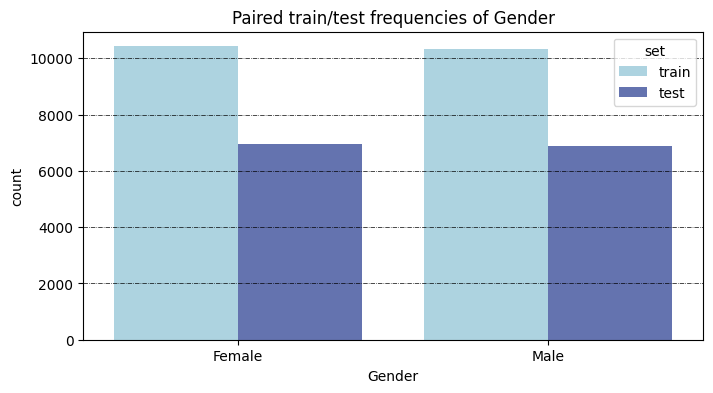

family_history_with_overweight ['no', 'yes']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


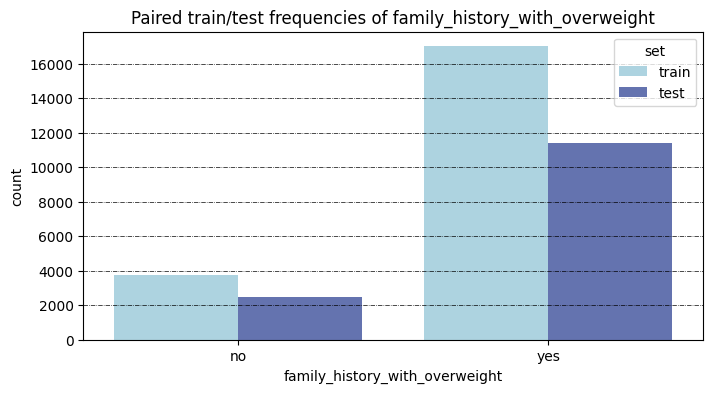

FAVC ['no', 'yes']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


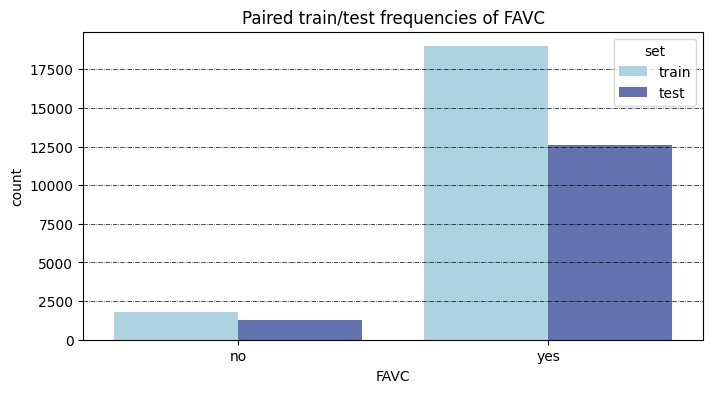

CAEC ['no', 'Always', 'Sometimes', 'Frequently']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


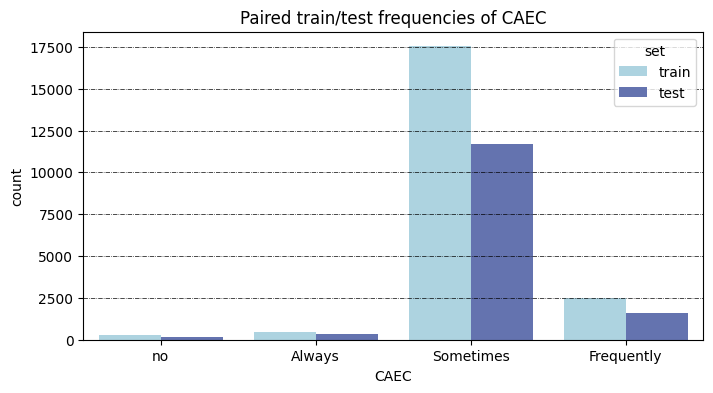

SMOKE ['no', 'yes']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


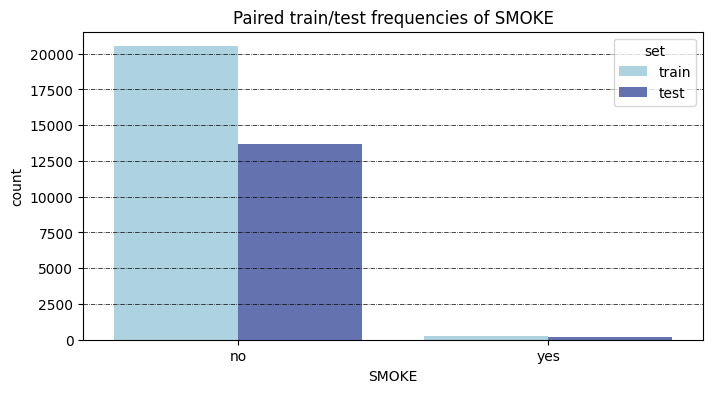

SCC ['no', 'yes']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


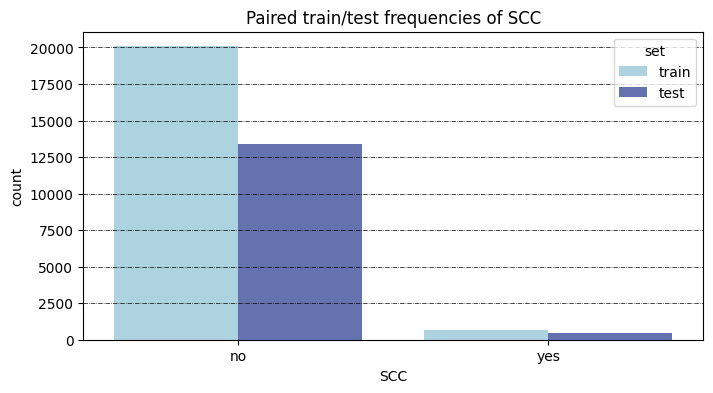

CALC ['no', 'Always', 'Sometimes', 'Frequently']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


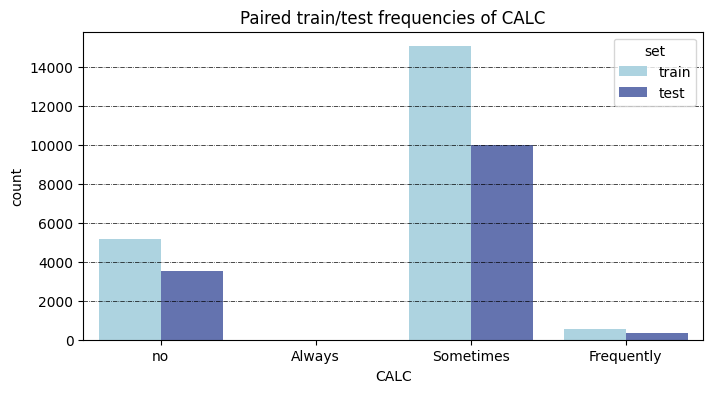

MTRANS ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']


<ipython-input-21-c2a0ff4c45e6>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


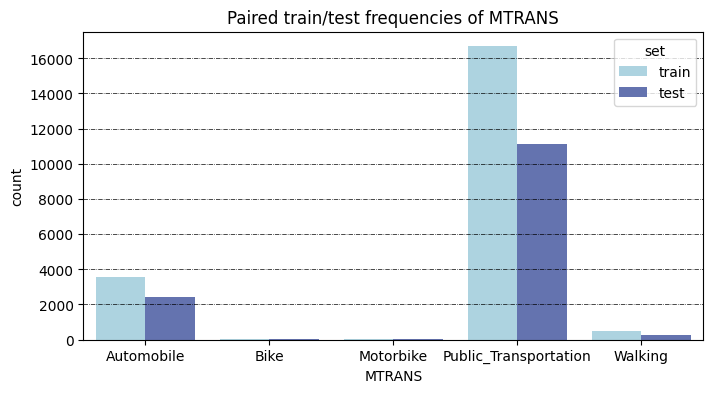

In [ ]:
def plot_count_pairs(train, test, feature, hue="set", order=None, palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax.set_title(f"Paired train/test frequencies of {feature}")
    plt.show()


for feature in categorical_features:
    if feature in ["CAEC", "CALC"]:
        order = ["no", "Always", "Sometimes", "Frequently"]
    else:
        order = sorted(train[feature].unique())

    print(feature, order)
    plot_count_pairs(train, test, feature=feature, order=order, palette=color_list)

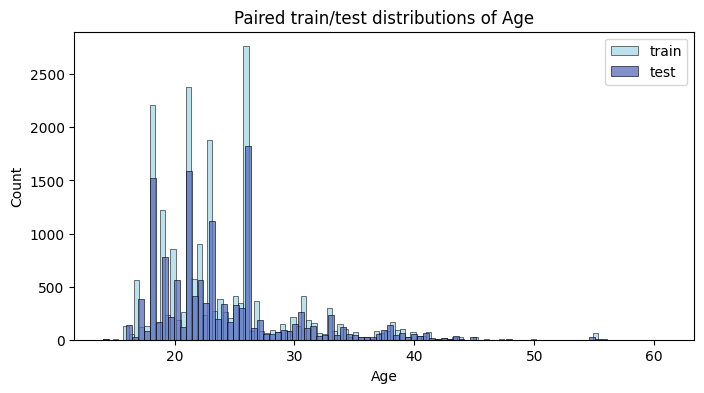

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


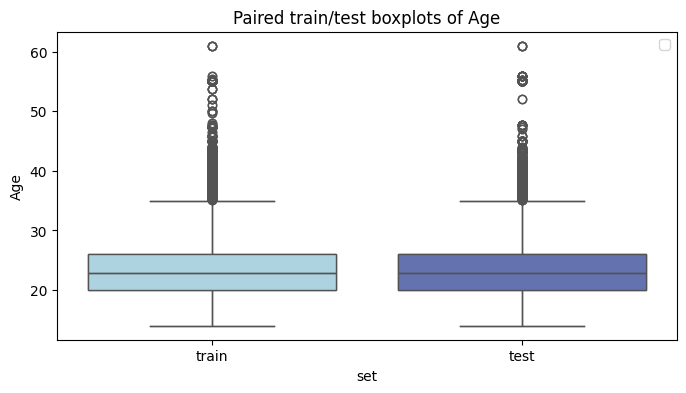

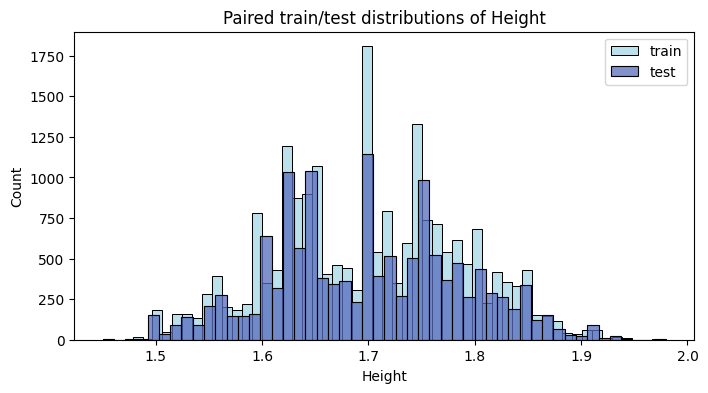

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


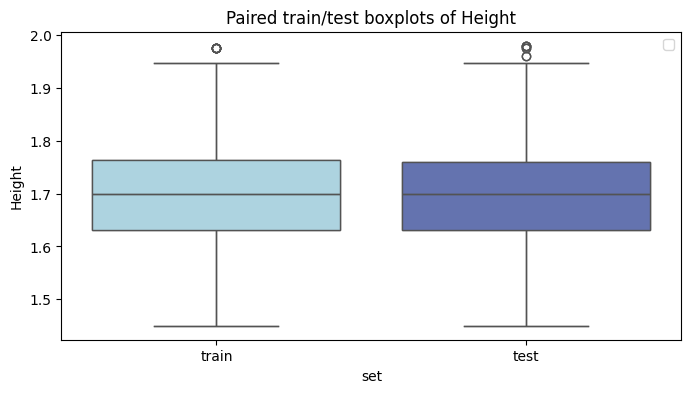

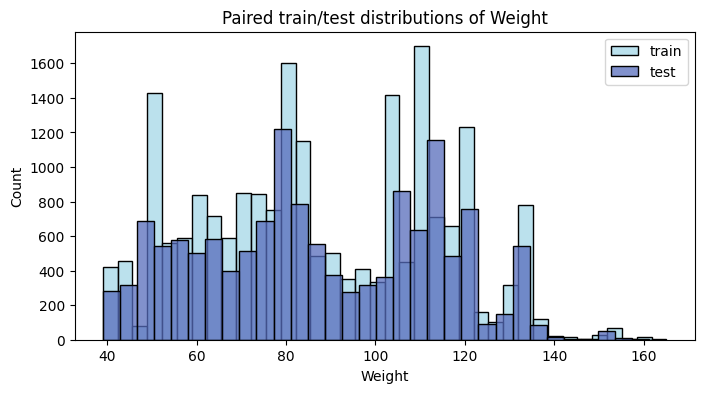

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


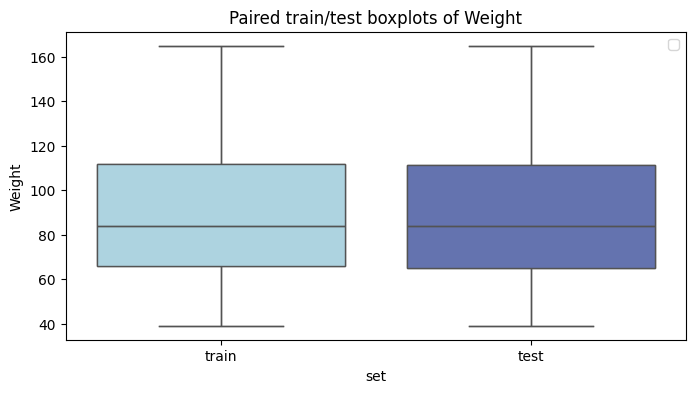

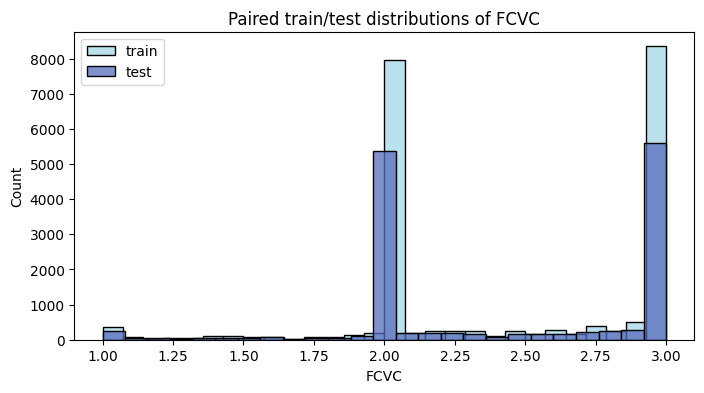

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


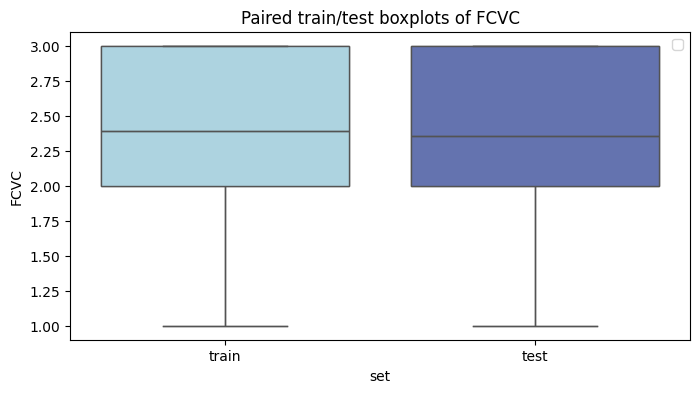

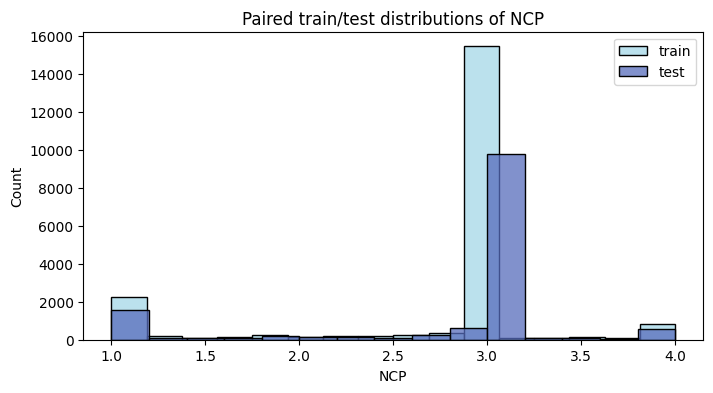

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


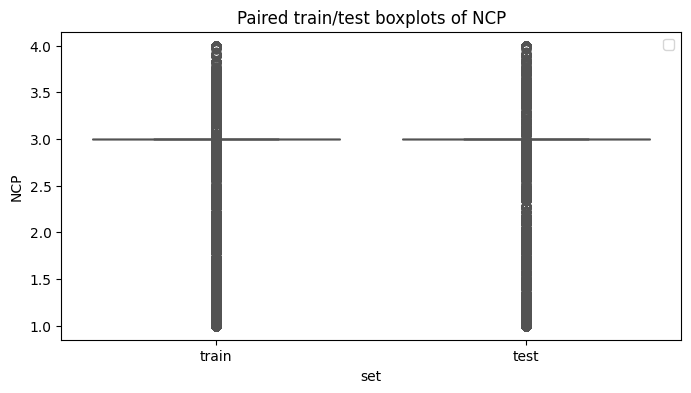

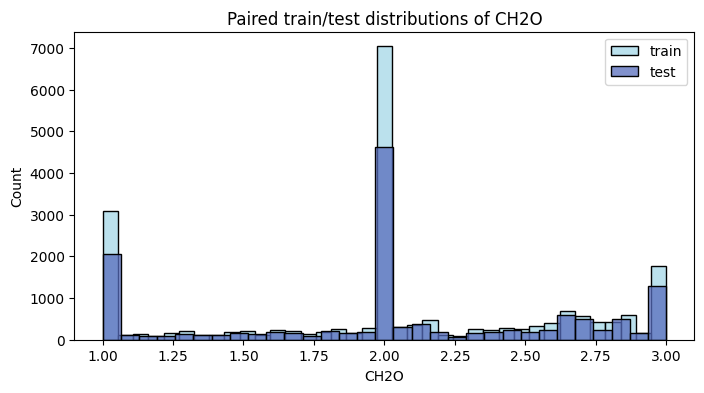

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


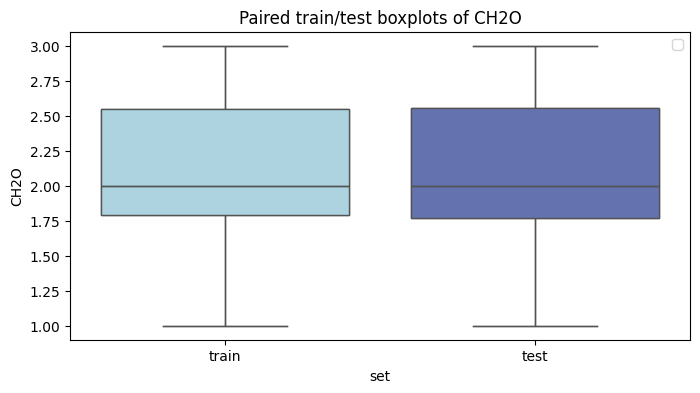

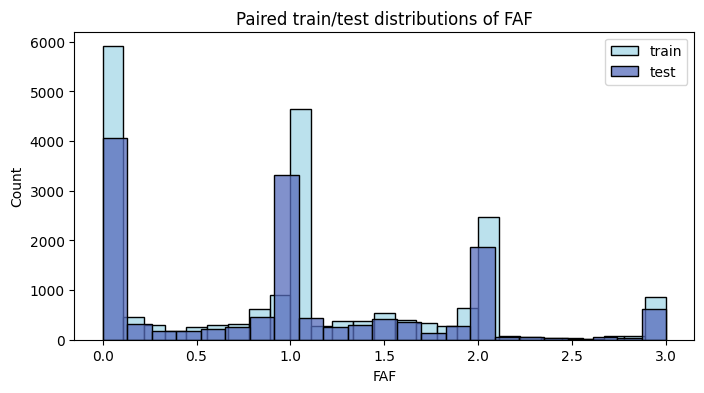

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


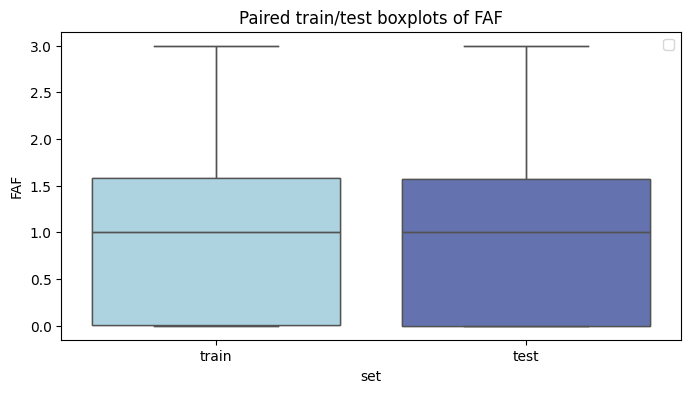

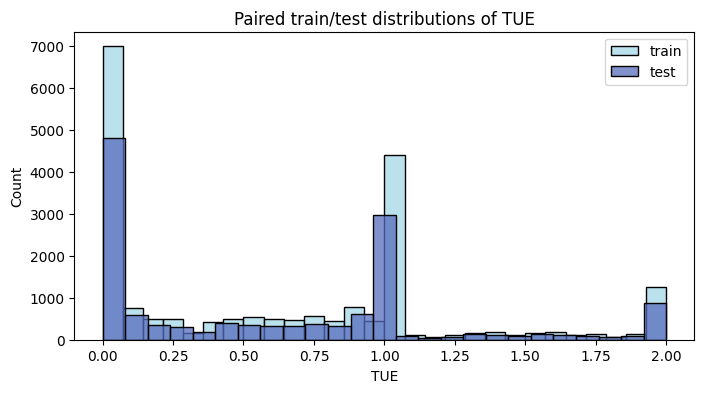

<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-22-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


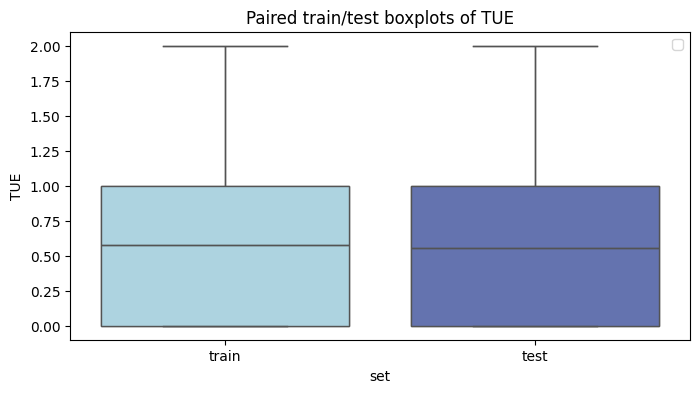

In [ ]:
import warnings

def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g = sns.histplot(selection, color=palette[i], ax=ax, label=s)
    ax.set_title(f"Paired train/test distributions of {feature}")
    g.legend()
    plt.show()

def plot_distribution_pairs_boxplot(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
    ax.set_title(f"Paired train/test boxplots of {feature}")
    g.legend()
    plt.show()

for feature in numeric_features:
    plot_distribution_pairs(train, test, feature, palette=color_list)
    plot_distribution_pairs_boxplot(train, test, feature, palette=color_list)

## 3.4 カテゴリーラベルをエンコーディング

scikit-learnのモジュールでラベル特徴量をエンコーディング

注意：pd.concat([train[categorical_features], test[categorical_features]]
trainとtestのどちらかにラベルがない場合、その列が作られない。
今回の場合、CALCにはtrainには、Alwaysのラベルがなく、
trainだけでエントーディングしてしまうと、CALC_Alwaysが作成されない。

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(pd.concat([train[categorical_features], test[categorical_features]], axis=0))

train_encoded = encoder.transform(train[categorical_features])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
test_encoded = encoder.fit_transform(test[categorical_features])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_sum = train_encoded_df.sum(axis=0).astype(int)
test_sum = test_encoded_df.sum(axis=0).astype(int)

sum_df = pd.concat([train_sum, test_sum], axis=1, keys=['Train', 'Test'])
sum_df

,Train,Test
Gender_Female,10422,6965
Gender_Male,10336,6875
family_history_with_overweight_no,3744,2456
family_history_with_overweight_yes,17014,11384
FAVC_no,1776,1257
FAVC_yes,18982,12583
CAEC_Always,478,359
CAEC_Frequently,2472,1617
CAEC_Sometimes,17529,11689
CAEC_no,279,175


## 3.5 特徴量の調整
上記のテーブルより、CALC_alwaysがtrainデータでは0となっている。
もし、CALCがターゲットと相関する特徴量である場合は問題となる。
そのため、CALCのデータを再編し、新たな特徴量をつくる

さらにCalc_AlwaysとCalc_Frequentlyが同様の意味を持つ特徴量の場合、
トレーニングに悪影響になる。そのため、2つを組み合わせて新たな特徴量とし、既存の2列は削除する


In [ ]:
combine_columns = ['CALC_Always', 'CALC_Frequently']

train_encoded_df['CALC_Always|Frequently'] = train_encoded_df[combine_columns].sum(axis=1)
test_encoded_df['CALC_Always|Frequently'] = test_encoded_df[combine_columns].sum(axis=1)
train_encoded_df = train_encoded_df.drop(columns=combine_columns).set_index(train.index)
test_encoded_df = test_encoded_df.drop(columns=combine_columns).set_index(test.index)

CALC_ordのラベルは頻度であるため、頻度の高い順に数字ラベルに変換

In [ ]:
levels = {"Always": 3, "Frequently": 2, "Sometimes": 1, "no": 0}
train["CALC_ord"] = train["CALC"].map(levels)
test["CALC_ord"] = test["CALC"].map(levels)
train["CAEC_ord"] = train["CAEC"].map(levels)
test["CAEC_ord"] = test["CAEC"].map(levels)

In [ ]:
train = pd.concat([train.drop(categorical_features, axis=1), train_encoded_df], axis=1)
test = pd.concat([test.drop(categorical_features, axis=1), test_encoded_df], axis=1)

## 3.6 Adversarial validation

trainデータの分布がtestデータと異なる場合、validationデータの分布もtrainデータの分布に寄ってしまい、上手くtestデータを予測できないことがある。その時に用いられる手法がadversarial validationである。

adversarial validationとは、trainデータとtestデータを分類するモデルを構築し、それを用いてtestデータになるべく近い分布のvalidationデータを作成することである。


https://qiita.com/shota-imazeki/items/6f48c78edf0ce3b316e1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score


# trainデータ、testデータに新たな列を作成し、
# trainデータには0を、testデータには1を入れ、データを結合する

X = pd.concat([train, test], axis=0)
y = [0] * len(train) + [1] * len(test)

# ランダムフォレストで交差検証
model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:, 1])
print(f"roc-auc score: {score:0.3f}")

roc-auc score: 0.499


スコアがほぼ0.5であるため、testデータとtrainデータの
判別がついていないことを意味する。よって両者の特徴量の分布は区別できないほど同等であると言える

## 3.7 特徴量エンジニアリング

特徴量を掛け合わせて、予測精度を向上させる特徴量を作成する

### 3.7.1 BMI

In [ ]:
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

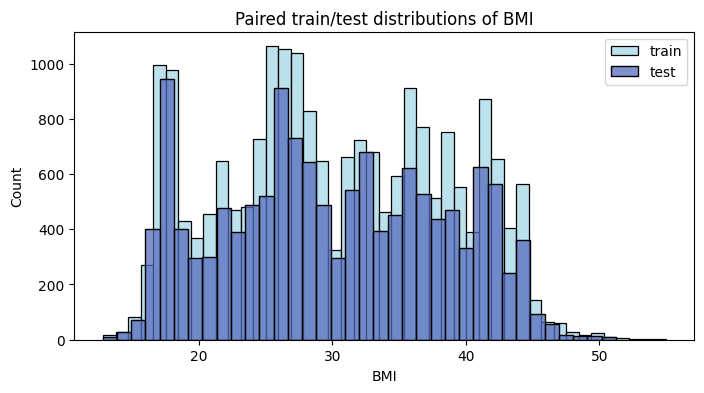

In [ ]:
plot_distribution_pairs(train, test, feature="BMI", palette=color_list)

### 3.7.2 Physical_Activity_Level

'FAF' (Physical activity frequency) から 'TUE' (Time using technology devices) を引くことで、身体的運動に費やしている時間を意味する特徴量を作成

*   リスト項目
*   リスト項目



In [ ]:
train['Physical_Activity_Level'] = train['FAF'] - train['TUE']
test['Physical_Activity_Level'] = test['FAF'] - test['TUE']

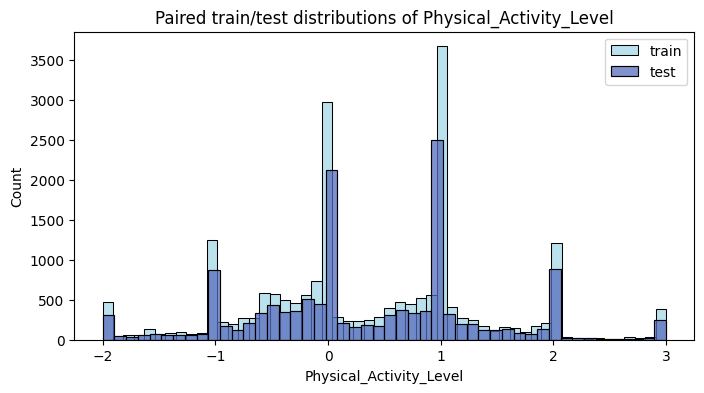

In [ ]:
plot_distribution_pairs(train, test, feature="Physical_Activity_Level", palette=color_list)

### 3.7.3 Meal_Habits

'FCVC' (Frequency of consumption of vegetables) と'NCP' (Number of main meals)から食習慣を表す特徴量を作成


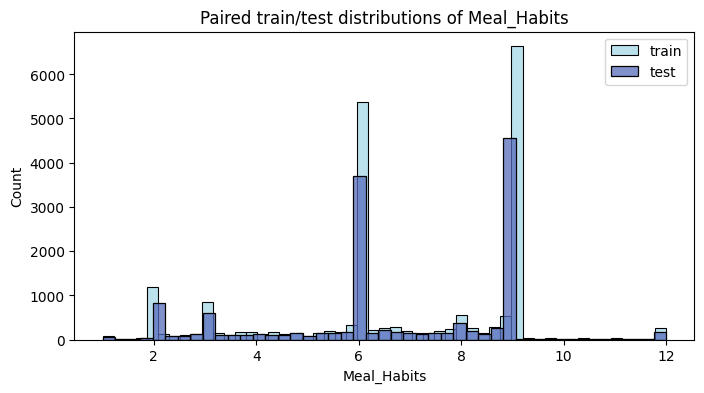

In [ ]:
train['Meal_Habits'] = train['FCVC'] * train['NCP']
test['Meal_Habits'] = test['FCVC'] * test['NCP']
plot_distribution_pairs(train, test, feature="Meal_Habits", palette=color_list)

### 3.7.4 Healthy_Nutrition_Habits

2 * train['FAVC_no'] - 1 の意味について
ラベル特徴量をOne-Hotエンコードした'FAVC_no'に該当すれば+1、該当しなければ-1となり、 'FCVC'の符号としている

つまり、

ハイカロリー摂取の習慣がない('FAVC_no'に該当)なら、'FCVC'の値をそのままとする(+1をかける)
ハイカロリー摂取の習慣がある('FAVC_no'に該当しない)なら、'FCVC'の値をマイナスにする(-1をかける)

In [ ]:
train['Healthy_Nutrition_Habits'] = train['FCVC'] / (2 * train['FAVC_no'] - 1)
test['Healthy_Nutrition_Habits'] = test['FCVC'] / (2 * test['FAVC_no'] - 1)

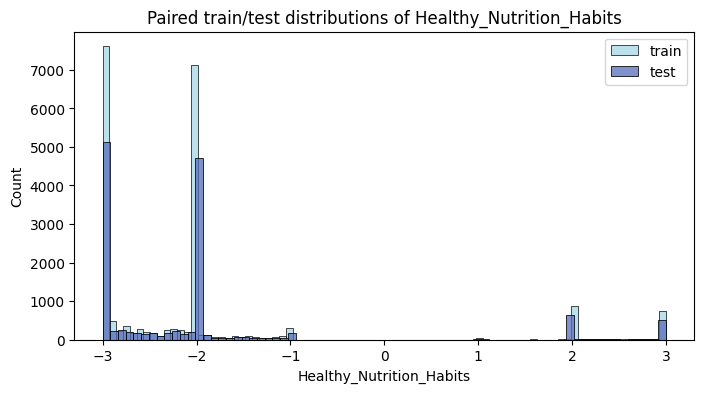

In [ ]:
plot_distribution_pairs(train, test, feature="Healthy_Nutrition_Habits", palette=color_list)

### 3.7.5 Tech_Usage_Score

TUE(Time using technology devices)を年齢('Age')でわることで、
1年齢あたりの時間としてスコアを計算

In [ ]:
train['Tech_Usage_Score'] = train['TUE'] / train['Age']
test['Tech_Usage_Score'] = test['TUE'] / test['Age']

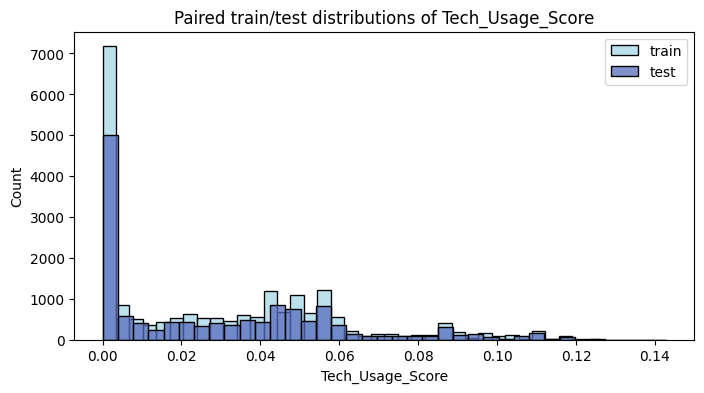

In [ ]:
plot_distribution_pairs(train, test, feature="Tech_Usage_Score", palette=color_list)

In [ ]:
train['Tech_Usage_Score'] = train['TUE'] / train['Age']
test['Tech_Usage_Score'] = test['TUE'] / test['Age']

### 3.7.6 加工した特徴量とターゲットデータを出力

In [ ]:
# train.to_csv("train.csv")
# test.to_csv("test.csv")
# target.to_csv("target.csv")

# 4 学習モデル

In [ ]:
## 交差検証のためにデータを分ける
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(train, y=target_numeric)

In [ ]:
list(cv_splits)

[(array([    0,     1,     2, ..., 20755, 20756, 20757]),
  array([   15,    24,    27, ..., 20740, 20741, 20754])),
 (array([    2,     3,     4, ..., 20755, 20756, 20757]),
  array([    0,     1,     7, ..., 20748, 20750, 20752])),
 (array([    0,     1,     2, ..., 20754, 20756, 20757]),
  array([   10,    22,    23, ..., 20728, 20732, 20755])),
 (array([    0,     1,     2, ..., 20752, 20754, 20755]),
  array([    3,     4,     6, ..., 20753, 20756, 20757])),
 (array([    0,     1,     3, ..., 20755, 20756, 20757]),
  array([    2,     5,    14, ..., 20746, 20749, 20751]))]

## 4.1 テンプレートモデル

まずはテンプレートとなるモデルを作成する

### 4.1.1 XGBoost

・XGBoost(決定木の勾配ブースティングアルゴリズム)
モデルがうまく予測できなかった特徴量に重みをつけてまたモデルを学習させることを繰り返し、
最後にそれぞれのモデルを使って最終的な予測をするアルゴリズム。モデルを決定木を用いる。
https://datawokagaku.com/xgboost/


In [ ]:
%%time

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score
from xgboost import XGBClassifier

xgb = XGBClassifier(
    booster='gbtree',  # gbtreeモデル gbtree,dart,gblinearの3つがある
    device='cuda',  # gpu
    tree_method='hist',
    num_class=len(set(target_numeric)),  #目的変数のクラス数 -> 肥満の段階
    n_estimators=300,  # 決定木の数
    max_depth=6,
    verbosity=0)

cv_splits = cv.split(train, y=target_numeric)
scorer = make_scorer(accuracy_score)

cv_results = cross_validate(xgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.902
CPU times: user 57.5 s, sys: 303 ms, total: 57.8 s
Wall time: 32.3 s


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

cv_splits = cv.split(train, y=target_numeric)
cv_cls_preds = cross_val_predict(xgb, train, target_numeric, cv=cv_splits)
print(classification_report(y_true=target_numeric, y_pred=cv_cls_preds, target_names=target_encoder.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93      2523
      Normal_Weight       0.87      0.88      0.88      3082
 Overweight_Level_I       0.79      0.77      0.78      2427
Overweight_Level_II       0.80      0.82      0.81      2522
     Obesity_Type_I       0.89      0.88      0.88      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.90     20758
          macro avg       0.89      0.89      0.89     20758
       weighted avg       0.90      0.90      0.90     20758



一部の結果、特にparticular Overweight_Level_IとOverweight_Level_IIの制度が比較的不十分と言える。

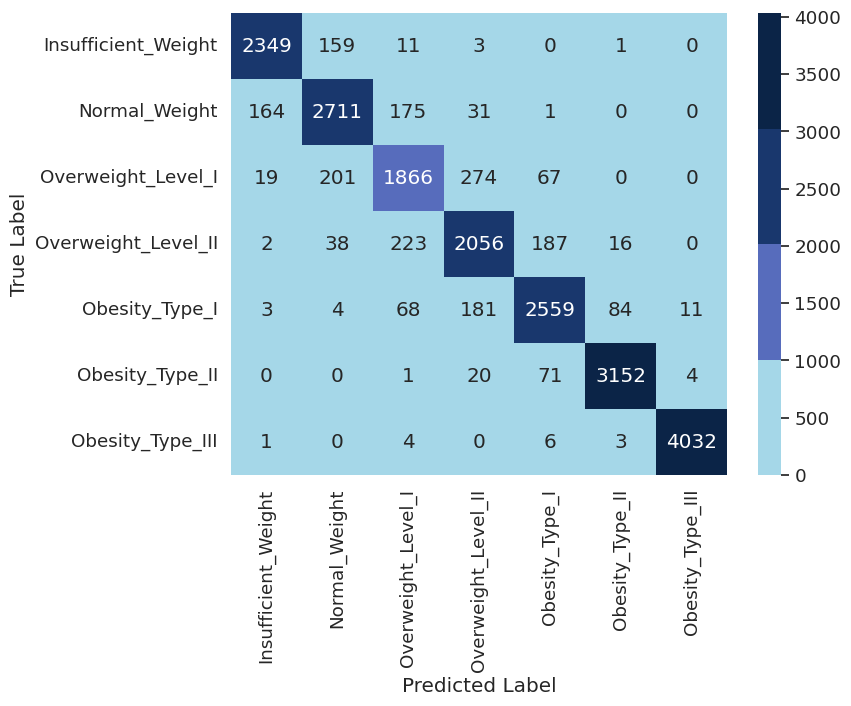

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom,
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 4.1.2 LightGBM

決定木アルゴリズムに基づいた勾配ブースティング。
XGBoostと理論が似ているが、細かい部分の実装が異なる。

複数の決定木をアンサンブル学習させ、得られたN番目決定木のモデルと実際の結果との誤差を訓練データとして、
N+1番目の決定木の学習を行う。

https://www.codexa.net/lightgbm-beginner/

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type="gbdt",
                     objective="multiclass",
                     metric="multi_logloss",
                     num_class=7,
                     learning_rate=0.025,
                     n_estimators=500,
                     lambda_l1=0.06,
                     lambda_l2=0.3,
                     max_depth=9,
                     colsample_bytree=0.40,
                     subsample=0.85,
                     min_child_samples=15,
                     verbosity=-1)

cv_splits = cv.split(train, y=target_numeric)

cv_results = cross_validate(lgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.909


                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93      2523
      Normal_Weight       0.88      0.89      0.89      3082
 Overweight_Level_I       0.81      0.78      0.80      2427
Overweight_Level_II       0.81      0.82      0.82      2522
     Obesity_Type_I       0.89      0.89      0.89      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.91     20758
          macro avg       0.90      0.90      0.90     20758
       weighted avg       0.91      0.91      0.91     20758



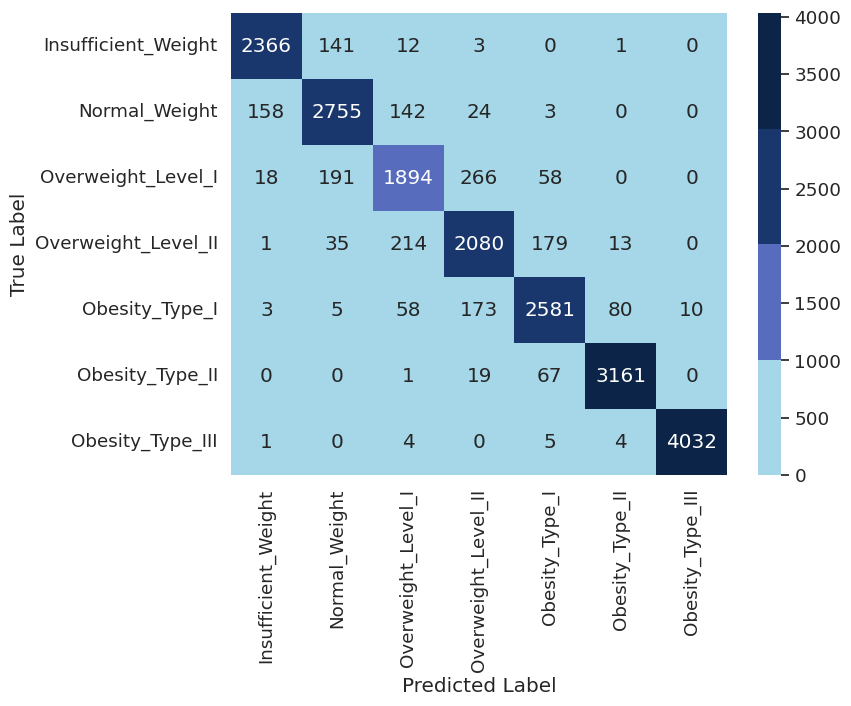

maximum possible improvement: 0.017


In [ ]:
cv_splits = cv.split(train, y=target_numeric)
cv_cls_lgb_preds = cross_val_predict(lgb, train, target_numeric, cv=cv_splits)

print(classification_report(y_true=target_numeric, y_pred=cv_cls_lgb_preds, target_names=target_encoder.classes_))

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_lgb_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom,
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

improvement = np.sum((cv_cls_lgb_preds == target_numeric) & (cv_cls_preds != target_numeric)) / len(target_numeric)
print(f"maximum possible improvement: {improvement:0.3f}")

###4.1.3 XGBoost multi_output_tree

デフォルトではmulti_strategyを"one_output_per_tree"となっており、それぞれのターゲット変数に独立して、モデルを作る。

一方で、 "multi_output_tree"とした場合、それぞれの決定木のノードは全てのターゲットと関連づいている。



In [ ]:
xgb = XGBClassifier(
    booster='gbtree',
    device='cpu',
    tree_method='hist',
    multi_strategy='multi_output_tree',
    objective='multi:softmax',
    num_class=len(set(target_numeric)),
    n_estimator=300,
    max_depth=6,
    verbosity=0)

cv_splits = cv.split(train, y=target_numeric)
cv_results = cross_validate(xgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)
accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.903


                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93      2523
      Normal_Weight       0.87      0.88      0.88      3082
 Overweight_Level_I       0.80      0.76      0.78      2427
Overweight_Level_II       0.80      0.82      0.81      2522
     Obesity_Type_I       0.89      0.88      0.89      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.90     20758
          macro avg       0.89      0.89      0.89     20758
       weighted avg       0.90      0.90      0.90     20758



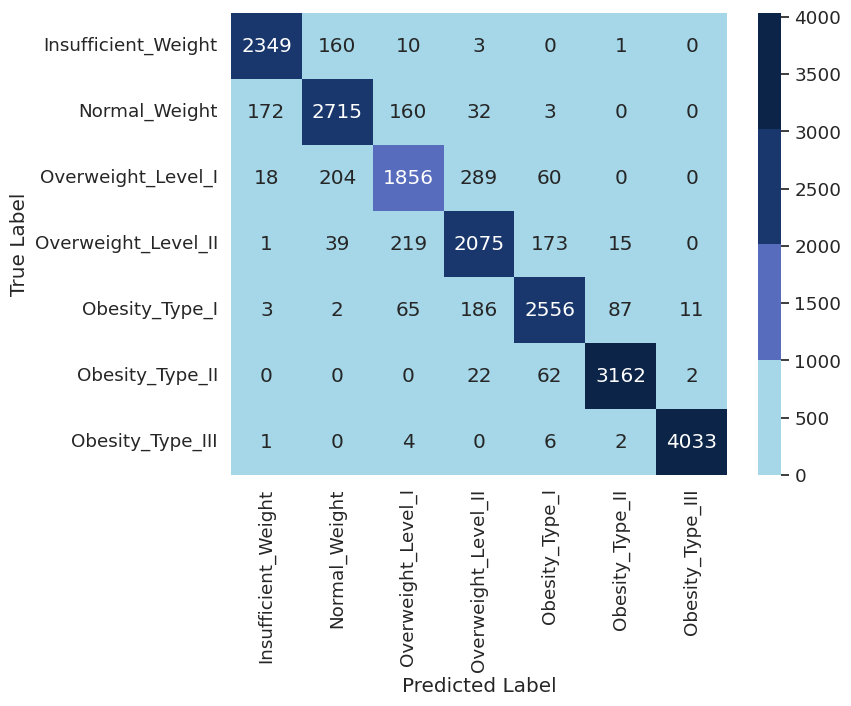

In [ ]:
cv_splits = cv.split(train, y=target_numeric)
cv_cls_multi_preds = cross_val_predict(xgb, train, target_numeric, cv=cv_splits)
print(classification_report(y_true=target_numeric, y_pred=cv_cls_multi_preds, target_names=target_encoder.classes_))

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_multi_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom,
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
improvement = np.sum((cv_cls_multi_preds == target_numeric) & (cv_cls_preds != target_numeric)) / len(target_numeric)
print(f"maximum possible improvement: {improvement:0.3f}")

maximum possible improvement: 0.018


## 4.2 回帰モデル

スコアはXGBに比べると小さく、XGBの方が優れている結果となった

In [ ]:
from xgboost import XGBRegressor

cv_splits = cv.split(train, y=target_numeric)
cv_scores = list()
cv_train_preds = np.zeros(len(train))
cv_test_preds = np.zeros(len(test))

for train_idx, val_idx in cv_splits:
    xgb = XGBRegressor(booster='gbtree',
                       device="cpu",
                       tree_method="hist",
                       n_estimators=200,
                       max_depth=4,
                       verbosity=0)
    xgb.fit(train.iloc[train_idx], target_numeric.iloc[train_idx])
    preds = xgb.predict(train.iloc[val_idx])
    cv_train_preds[val_idx] = preds
    cv_test_preds += xgb.predict(test) / cv.n_splits
    cls_preds = np.clip(np.round(preds).astype(int), a_min=0, a_max=6)

    cv_scores.append(accuracy_score(y_true=target_numeric.iloc[val_idx], y_pred=cls_preds))

accuracy_mean = np.mean(cv_scores)
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.884


In [ ]:
print(classification_report(y_true=target_numeric,
                            y_pred=np.clip(np.round(cv_train_preds).astype(int), a_min=0, a_max=6),
                            target_names=target_encoder.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92      2523
      Normal_Weight       0.86      0.86      0.86      3082
 Overweight_Level_I       0.76      0.74      0.75      2427
Overweight_Level_II       0.74      0.78      0.76      2522
     Obesity_Type_I       0.87      0.84      0.85      2910
    Obesity_Type_II       0.96      0.96      0.96      3248
   Obesity_Type_III       1.00      0.99      1.00      4046

           accuracy                           0.88     20758
          macro avg       0.87      0.87      0.87     20758
       weighted avg       0.88      0.88      0.88     20758



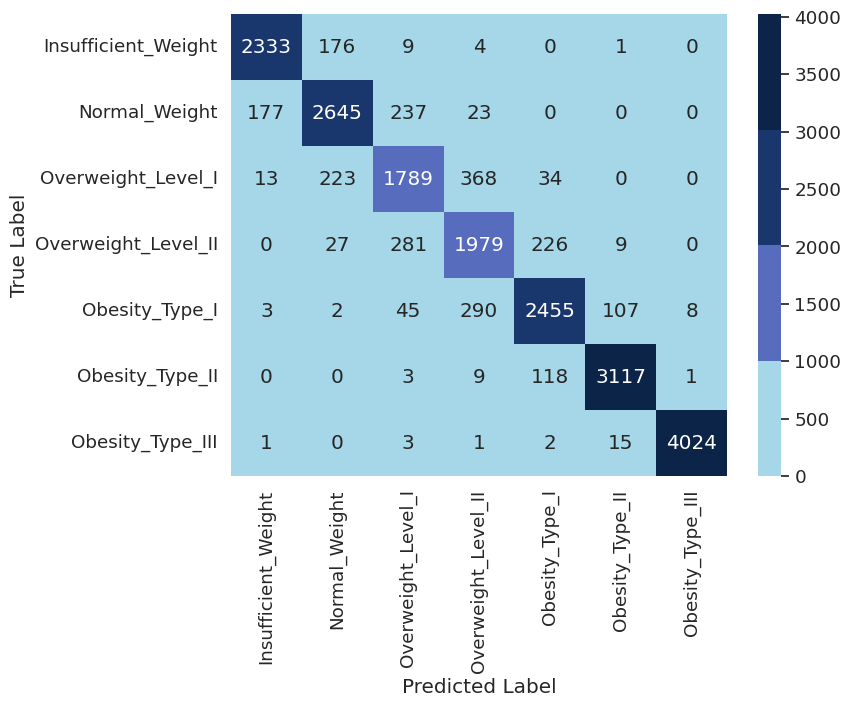

In [ ]:
conf_matrix = confusion_matrix(y_true=target_numeric,
                               y_pred=np.clip(np.round(cv_train_preds).astype(int), a_min=0, a_max=6))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom,
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 4.3 Optunaを使ったハイパーパラメータの決定


In [ ]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.5 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler


def objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 16),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
    }

    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softmax'
    params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "hist"

    xgb = XGBClassifier(**params)
    cv_splits = cv.split(train, y=target_numeric)

    cv_scores = cross_validate(estimator=xgb,
                               X=train,
                               y=target_numeric,
                               scoring=scorer,
                               cv=cv_splits)

    cv_evaluation = np.mean(np.abs(cv_scores['test_score']))
    return cv_evaluation


sqlite_db = "sqlite:///sqlite.db"
study_name = "multi_class_prediction_of_obesity_risk"
study = optuna.create_study(storage=sqlite_db, study_name=study_name,
                            sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0),
                            direction="maximize", load_if_exists=True)

# 処理が遅いため、n_trials=2とした
study.optimize(objective, n_trials=130)
# study.optimize(objective, n_trials=2)
print(f"best optmized accuracy: {study.best_value:0.5f}")
print(f"best hyperparameters: {study.best_params}")

best_cls_params = study.best_params
best_cls_params['objective'] = 'multi:softmax'
best_cls_params['tree_method'] = "hist"
best_cls_params["device"] = "cuda"
best_cls_params["verbosity"] = 0

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-02-25 14:39:28,767] A new study created in RDB with name: multi_class_prediction_of_obesity_risk
[I 2024-02-25 14:40:34,894] Trial 0 finished with value: 0.9055789653490187 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 643, 'learning_rate': 0.1229607110732571, 'gamma': 0.21182740024579755, 'subsample': 0.7521258791466592, 'colsample_bytree': 0.6063110478838847, 'max_depth': 15, 'min_child_weight': 7, 'reg_lambda': 1.65141683303417e-05, 'reg_alpha': 0.5116528751408895}. Best is trial 0 with value: 0.9055789653490187.
[I 2024-02-25 14:42:03,135] Trial 1 finished with value: 0.8986418413001672 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 933, 'learning_rate': 0.013869861245357327, 'gamma': 0.04356465076364105, 'subsample': 0.314152878208228, 'cols

best optmized accuracy: 0.91040
best hyperparameters: {'grow_policy': 'depthwise', 'n_estimators': 903, 'learning_rate': 0.025389870241768295, 'gamma': 0.22668605417167512, 'subsample': 0.7387348238200011, 'colsample_bytree': 0.3002979668074112, 'max_depth': 7, 'min_child_weight': 1, 'reg_lambda': 0.002473125130697867, 'reg_alpha': 0.6123503881457741}


## 4.4 再解析

ここまででパラメータのフィッテイングが終了したので、
再度モデル使って予想する。

モデルはXGBを採用

In [ ]:
xgb = XGBClassifier(**best_cls_params)
xgb.fit(train, target_numeric)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3002979668074112, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.22668605417167512,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.025389870241768295,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=903, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

# 5 SHAP (SHapley Additive exPlanations)
SHAP法を用いて、特徴量の寄与度を評価。

https://tech.datafluct.com/entry/20220223/1645624741#:~:text=SHAP(SHapley%20Additive%20exPlanations)%E3%81%AF,%E4%BA%BA%E6%B0%97%E3%81%AE%E9%AB%98%E3%81%84%E6%89%8B%E6%B3%95%E3%81%A7%E3%81%99%E3%80%82

In [ ]:
from xgboost import DMatrix

booster = xgb.get_booster()

feature_names = train.columns
Xd = DMatrix(train)

shap_values = booster.predict(Xd, pred_contribs=True)
preds = booster.predict(Xd)

In [ ]:
shap_values[:, 0, :-1].shape

(20758, 37)

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.4 MB/s eta 0:00:00


VIOLIN PLOT REPRESENTING <Insufficient_Weight>


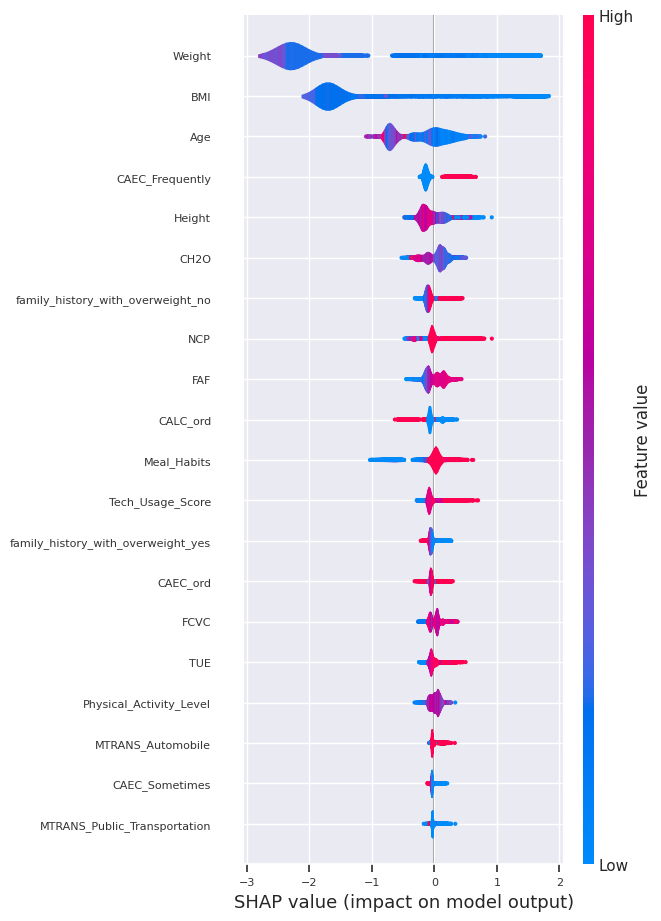


VIOLIN PLOT REPRESENTING <Normal_Weight>


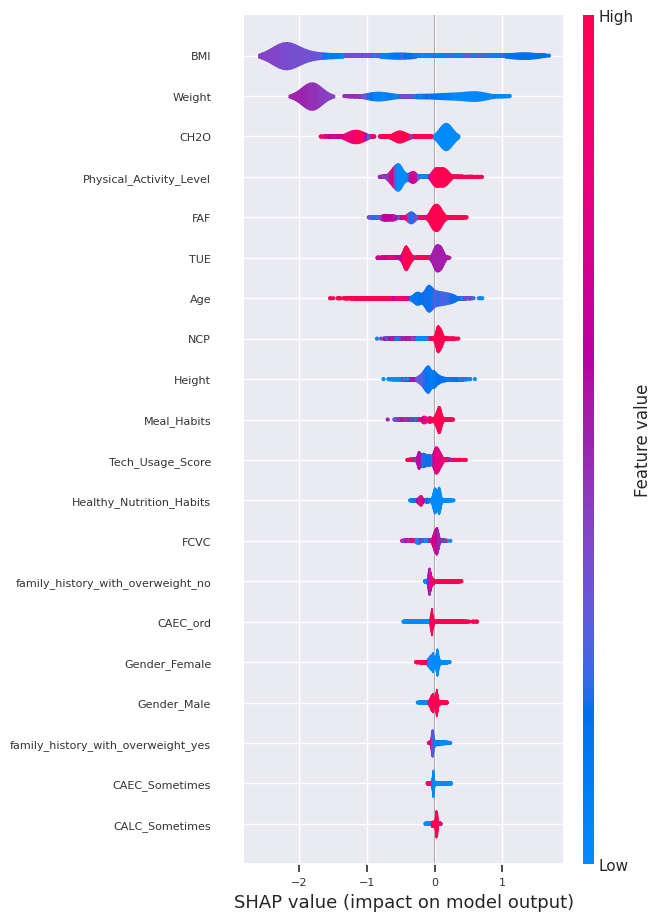


VIOLIN PLOT REPRESENTING <Overweight_Level_I>


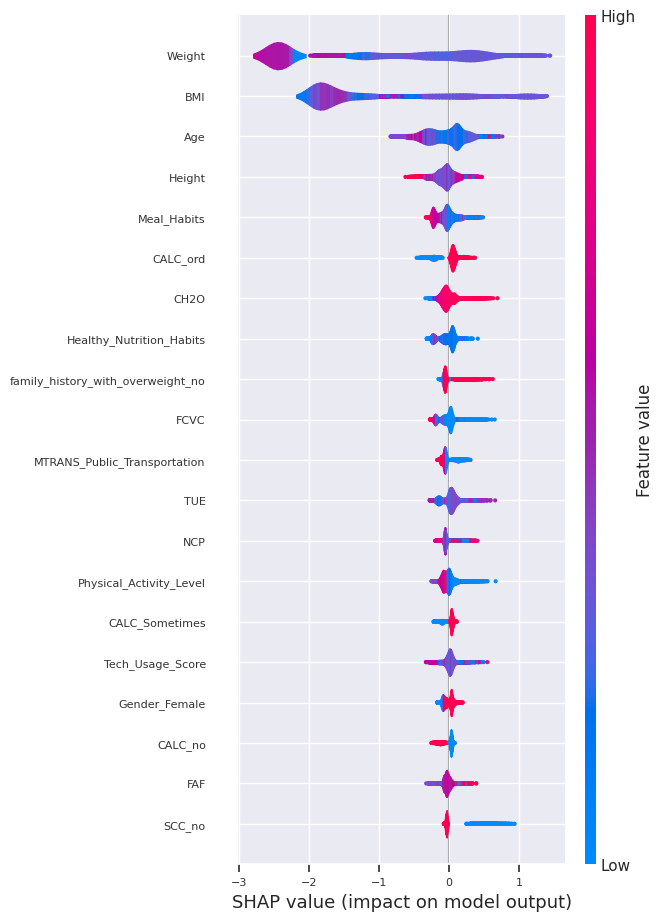


VIOLIN PLOT REPRESENTING <Overweight_Level_II>


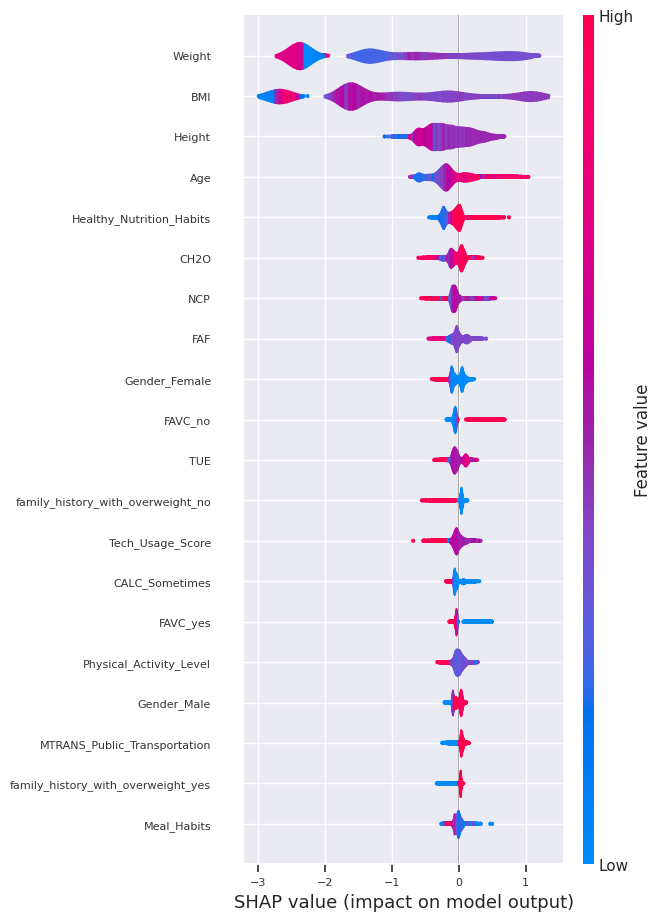


VIOLIN PLOT REPRESENTING <Obesity_Type_I>


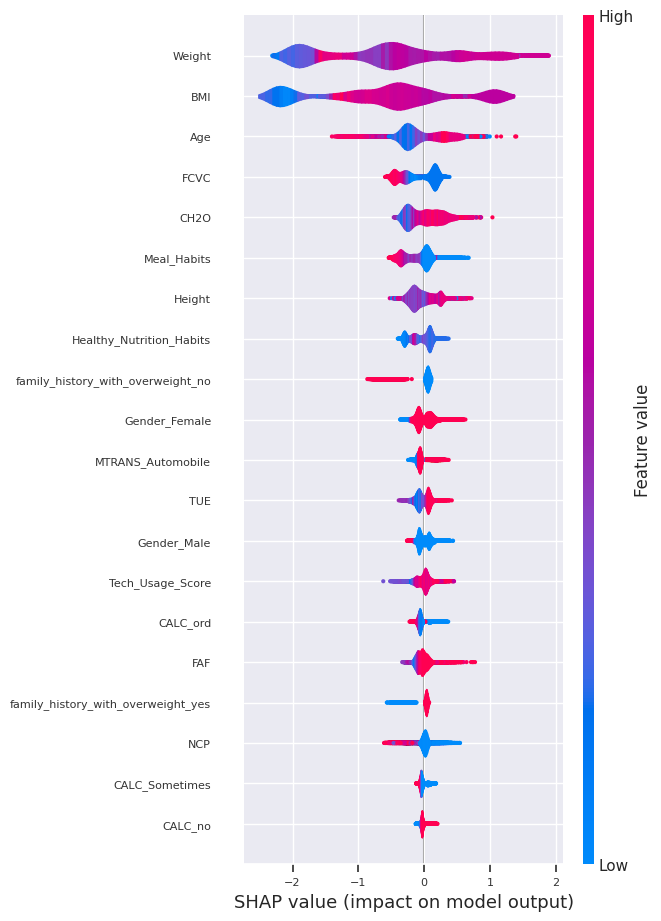


VIOLIN PLOT REPRESENTING <Obesity_Type_II>


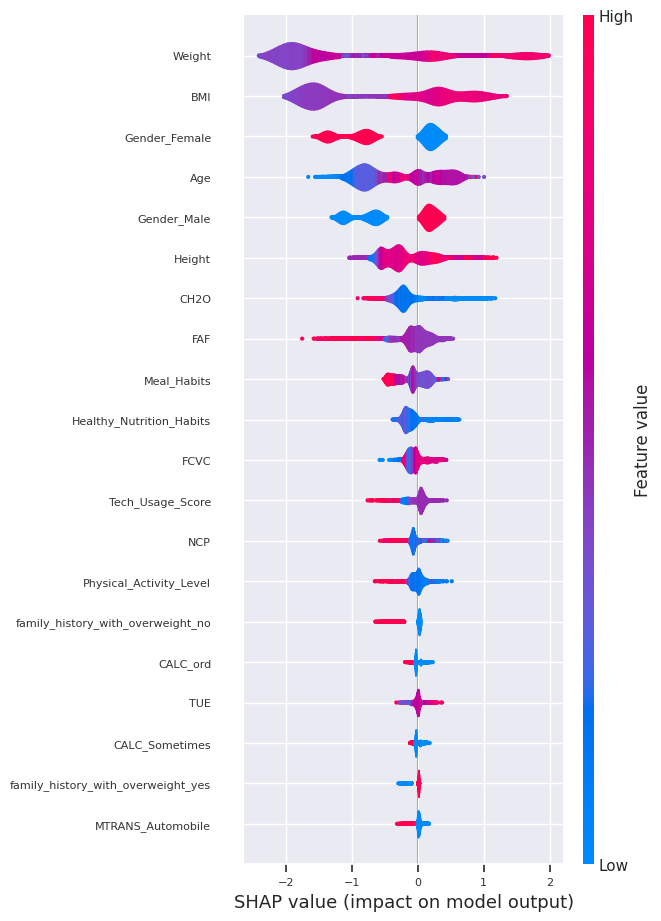


VIOLIN PLOT REPRESENTING <Obesity_Type_III>


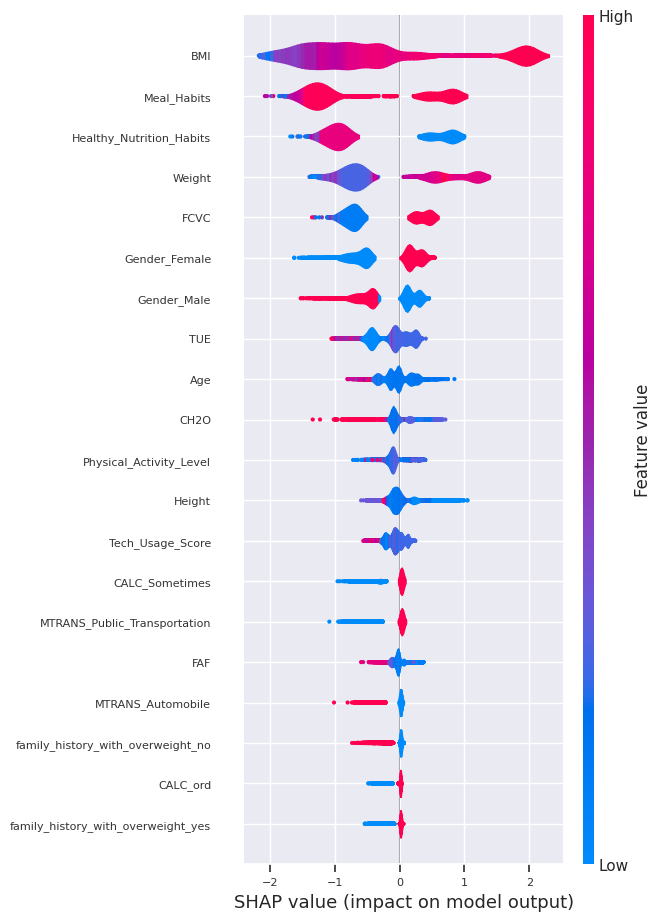

In [ ]:
import shap
import matplotlib.pyplot as plt

for k, target_label in enumerate(target_encoder.classes_):
    print(f"VIOLIN PLOT REPRESENTING <{target_label}>")
    shap.summary_plot(shap_values[:, k, :-1], train.values,
                      plot_type="violin",
                      feature_names=feature_names, show=False)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()
    print()

# 6 提出の準備

In [ ]:
preds = xgb.predict(test)
labelled_preds = target_encoder.inverse_transform(preds)

In [ ]:
# submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission = pd.read_csv("/content/sample_submission.csv")
submission["NObeyesdad"] = labelled_preds.values
submission.to_csv("xgb_submission.csv", index=False)

In [ ]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
from copy import copy

multi_cls_params = copy(best_cls_params)
multi_cls_params["device"] = "cpu"
multi_cls_params["tree_method"] = "hist"
multi_cls_params["multi_strategy"] = "multi_output_tree"

In [ ]:
multi = XGBClassifier(**multi_cls_params)
multi.fit(train, target_numeric)

lgb = LGBMClassifier(boosting_type="gbdt",
                     objective="multiclass",
                     metric="multi_logloss",
                     num_class=7,
                     learning_rate=0.025,
                     n_estimators=500,
                     lambda_l1=0.06,
                     lambda_l2=0.3,
                     max_depth=9,
                     colsample_bytree=0.40,
                     subsample=0.85,
                     min_child_samples=15,
                     verbosity=-1)

lgb.fit(train, target_numeric)

xgb_preds = xgb.predict_proba(test)
lgb_preds = lgb.predict_proba(test)
multixgb_preds = multi.predict_proba(test)

In [ ]:
blended_preds = np.argmax((xgb_preds + lgb_preds + multixgb_preds), axis=1).ravel()
labelled_blended_preds = target_encoder.inverse_transform(blended_preds)

In [ ]:
# submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission = pd.read_csv("/content/sample_submission.csv")
submission["NObeyesdad"] = labelled_preds.values
submission.to_csv("xgb_submission_using_sample_notebook.csv", index=False)

In [ ]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
!kaggle competitions submit -c playground-series-s4e2 -f xgb_submission_using_sample_notebook.csv -m "Message"

100% 312k/312k [00:00<00:00, 416kB/s]
Successfully submitted to Multi-Class Prediction of Obesity Risk